In [2]:
import os
os.getcwd()

'/Users/mahendar/Documents/MMA/Career Advancement/apziva/happy_customers'

In [3]:
import numpy as np
import pandas as pd

In [4]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [35]:
# load dataset

acme = pd.read_csv("ACME-HappinessSurvey2020.csv")

In [53]:
acme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [44]:
# Target variable distribution 
acme["Y"].value_counts(normalize=True)

1    0.547619
0    0.452381
Name: Y, dtype: float64

In [45]:
y = acme['Y']
X = acme.drop('Y',axis=1)

In [46]:
# train-test split (70%-30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [47]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test],axis=1)

In [75]:
# Pycaret will help in choosing the best performing Model on this dataset

from pycaret.classification import *
s = setup(data = train, 
          test_data = test,
          target = 'Y',
          ordinal_features = {'X1' : ['1','3','4','5'],
                              'X2' : ['1','2','3','4','5'],
                              'X3' : ['1','2','3','4','5'],
                              'X4' : ['1','2','3','4','5'],
                              'X5' : ['1','2','3','4','5'],
                              'X6' : ['1','3','4','5']},
          fix_imbalance=True,
          pca=True,
          pca_method='linear',
          remove_multicollinearity=True,
          multicollinearity_threshold = 0.6,
          create_clusters=True,
          group_features = ['X1','X2','X3','X4','X5','X6'],
          feature_selection=True,
          session_id = 123)

,Description,Value
0,session_id,123
1,Target,Y
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(88, 7)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,6
8,Ordinal Features,True
9,High Cardinality Features,False


In [76]:
%%time
# compare all models
best = compare_models(fold = 10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7403,0.7500,0.7033,0.8333,0.7473,0.4777,0.5013,0.0040
et,Extra Trees Classifier,0.6500,0.7067,0.6667,0.7248,0.6782,0.2866,0.2988,0.0220
lightgbm,Light Gradient Boosting Machine,0.6486,0.6892,0.6233,0.7331,0.6664,0.2848,0.2954,0.0040
ada,Ada Boost Classifier,0.6389,0.6922,0.6667,0.6983,0.6702,0.2674,0.2670,0.0080
gbc,Gradient Boosting Classifier,0.6375,0.7333,0.7067,0.7031,0.6921,0.2477,0.2570,0.0060
rf,Random Forest Classifier,0.6292,0.7217,0.6667,0.6900,0.6674,0.2432,0.2444,0.0260
dt,Decision Tree Classifier,0.6264,0.6800,0.6100,0.7255,0.6424,0.2510,0.2715,0.0020
qda,Quadratic Discriminant Analysis,0.6181,0.6414,0.5867,0.7386,0.6153,0.2130,0.2479,0.0030
nb,Naive Bayes,0.6167,0.6597,0.6267,0.7333,0.6359,0.2094,0.2389,0.0020
lda,Linear Discriminant Analysis,0.5597,0.6558,0.5633,0.5914,0.5664,0.0985,0.0908,0.0020


CPU times: user 1.97 s, sys: 58.2 ms, total: 2.03 s
Wall time: 2.78 s


In [77]:
print(best)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [78]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8889,0.9167,0.8333,1.0000,0.9091,0.7692,0.7906
1,0.7778,0.8750,0.8000,0.8000,0.8000,0.5500,0.5500
2,0.7778,0.8250,0.8000,0.8000,0.8000,0.5500,0.5500
3,0.6667,0.7250,0.6000,0.7500,0.6667,0.3415,0.3500
4,0.7778,0.6750,0.6000,1.0000,0.7500,0.5714,0.6325
5,0.6667,0.6000,0.4000,1.0000,0.5714,0.3721,0.4781
6,0.5556,0.5250,0.6000,0.6000,0.6000,0.1000,0.1000
7,0.6667,0.7250,0.6000,0.7500,0.6667,0.3415,0.3500
8,0.8750,0.8667,1.0000,0.8333,0.9091,0.7143,0.7454
9,0.7500,0.7667,0.8000,0.8000,0.8000,0.4667,0.4667


In [79]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.9444,0.6667,1.0000,0.8000,0.5714,0.6325
1,0.8889,0.8250,0.8000,1.0000,0.8889,0.7805,0.8000
2,0.7778,0.8250,0.8000,0.8000,0.8000,0.5500,0.5500
3,0.6667,0.7250,0.6000,0.7500,0.6667,0.3415,0.3500
4,0.7778,0.8000,0.6000,1.0000,0.7500,0.5714,0.6325
5,0.5556,0.8000,0.2000,1.0000,0.3333,0.1818,0.3162
6,0.5556,0.4750,0.6000,0.6000,0.6000,0.1000,0.1000
7,0.6667,0.7500,0.6000,0.7500,0.6667,0.3415,0.3500
8,0.8750,0.9667,0.8000,1.0000,0.8889,0.7500,0.7746
9,0.7500,0.8000,0.6000,1.0000,0.7500,0.5294,0.6000


In [80]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='uniform')


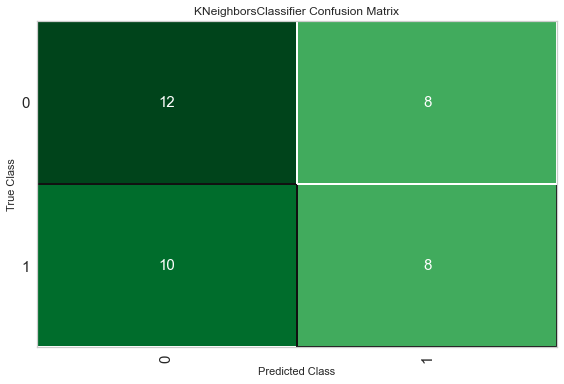

In [81]:
plot_model(tuned_knn, plot = 'confusion_matrix')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

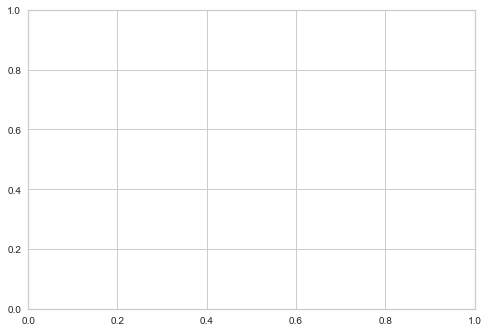

In [86]:
evaluate_model(tuned_knn)

In [82]:
predict_model(tuned_knn)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.5263,0.5194,0.4444,0.5000,0.4706,0.0447,0.0449


,Component_1,Component_2,Component_3,Y,Label,Score
0,-1.007291,-0.114026,-0.245594,0,0,0.50
1,-1.295728,-0.076007,0.354242,0,1,1.00
2,2.117411,0.003629,-0.232394,0,0,1.00
3,1.218294,-0.711069,0.121499,0,0,0.50
4,-0.935182,-0.123530,-0.395553,0,1,0.75
5,1.362512,-0.730078,-0.178419,1,0,0.50
6,0.286178,1.381902,0.096333,1,0,0.75
7,-1.079400,-0.104521,-0.095635,0,1,1.00
8,2.944419,0.727831,-0.436328,0,0,1.00
9,0.391286,-1.435271,0.325433,1,1,0.75
